## IMPORTING THE DEPENDENCIES

In [267]:
import pandas as pd
import numpy as np
import plotly.express as px

## LOADING DATASET 

In [268]:
dataset=pd.read_csv("pokemon.csv")
dataset

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


## CHECKING NULL VALUES

In [269]:
dataset.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

## UNDERSTANDING THE RANGE AND DATA

In [270]:
dataset.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


## SHAPE OF DATASET

In [271]:
dataset.shape

(800, 13)

## DATA PREPROCESSING

In [273]:
def Helper(x):
    x=x.split(' ')
#     x=["xyzP","xyz"]
    if len(x)==1:
        return ''.join(x)
    else:
        diff=len(x[1])
        op=''.join(x)
        return op[diff:]
        
dataset['Name']=dataset['Name'].apply(lambda x:Helper(x))

In [274]:
dataset['Type 2'].fillna(dataset['Type 1'],inplace=True)

## AFTER DOING CERTAIN OPERATION VIEWING DATASET

In [275]:
dataset

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,MegaVenusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,MegaDiancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,paConfined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,opaUnbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


## HIT POINTS ANALYSIS

In [276]:
maxi=max(dataset['HP'])
dataset[dataset['HP']==maxi]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
261,242,Blissey,Normal,Normal,540,255,10,10,75,135,55,2,False


In [277]:
mini=min(dataset['HP'])
dataset[dataset['HP']==mini]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
316,292,Shedinja,Bug,Ghost,236,1,90,45,30,30,40,3,False


## TOTAL ANALYSIS

In [278]:
maxi=max(dataset['Total'])
dataset[dataset['Total']==maxi]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,MegaMewtwoX,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,150,MegaMewtwoY,Psychic,Psychic,780,106,150,70,194,120,140,1,True
426,384,MegaRayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True


In [279]:
mini=min(dataset['Total'])
dataset[dataset['Total']==maxi]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,MegaMewtwoX,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,150,MegaMewtwoY,Psychic,Psychic,780,106,150,70,194,120,140,1,True
426,384,MegaRayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True


## ATTACK ANALYSIS

In [280]:
mini=min(dataset['Attack'])
dataset[dataset['Attack']==mini]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
121,113,Chansey,Normal,Normal,450,250,5,5,35,105,50,1,False
488,440,Happiny,Normal,Normal,220,100,5,5,15,65,30,4,False


In [281]:
maxi=max(dataset['Attack'])
dataset[dataset['Attack']==maxi]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,MegaMewtwoX,Psychic,Fighting,780,106,190,100,154,100,130,1,True


## DEFENSE ANALYSIS

In [282]:
mini=min(dataset['Defense'])
dataset[dataset['Defense']==mini]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
121,113,Chansey,Normal,Normal,450,250,5,5,35,105,50,1,False
488,440,Happiny,Normal,Normal,220,100,5,5,15,65,30,4,False


In [283]:
maxi=max(dataset['Defense'])
dataset[dataset['Defense']==maxi]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,208,MegaSteelix,Steel,Ground,610,75,125,230,55,95,30,2,False
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
333,306,MegaAggron,Steel,Steel,630,70,140,230,60,80,50,3,False


## LEGENDARY POKEMON HAVING SPEED GREATER THAN 140

In [284]:
# Pokemon having speed greater than 140 and are legendary
dataset.query("Speed>140 & Legendary==True")

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
428,386,sNormalForme,Psychic,Psychic,600,50,150,50,150,50,150,3,True
429,386,sAttackForme,Psychic,Psychic,600,50,180,20,180,20,150,3,True
431,386,sSpeedForme,Psychic,Psychic,600,50,95,90,95,90,180,3,True


## POKEMON HAVING MAXIMUM DEFENSE AND LOWEST ATTACK

In [285]:
dataset.sort_values(by=['Defense','Attack'],ascending=[False,True]).head(1)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False


## POKEMON HAVING TYPE 1 AS *"WATER"* WHILE TYPE 2 AS *"ICE"*

In [286]:
# How many type 1=water and type 2=Ice
dataset.query("`Type 1`=='Water' & `Type 2`=='Ice'")

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
94,87,Dewgong,Water,Ice,475,90,70,80,70,95,70,1,False
98,91,Cloyster,Water,Ice,525,50,95,180,85,45,70,1,False
142,131,Lapras,Water,Ice,535,130,85,80,85,95,60,1,False


## POKEMON HAVING TYPE AS FIRE AND LEGENDARY

In [300]:
dataset.loc[
    ((dataset['Type 1']=='Fire') & (dataset['Legendary']),
    ['Name','Attack','Generation'])
]

,Name,Attack,Generation
158,Moltres,100,1
263,Entei,115,2
270,Ho-oh,130,2
542,Heatran,90,4
799,Volcanion,110,6


## IS'NT IT EXCITING TO KNOW WHAT IS TYPE OF MOST OF LEGENDARY POKEMON ?

<AxesSubplot: >

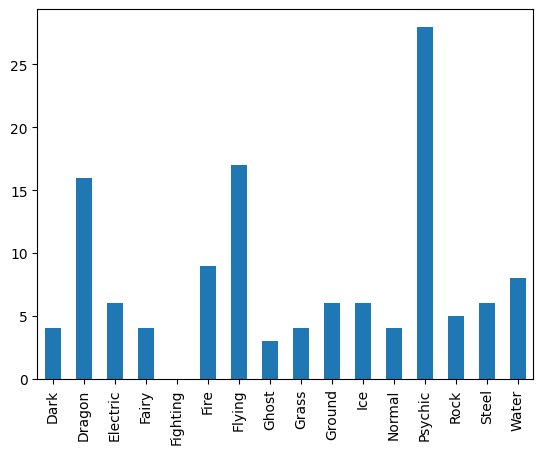

In [288]:
total=dataset[dataset['Legendary']]['Type 1'].value_counts()+dataset[dataset['Legendary']]['Type 2'].value_counts()
total.plot(kind='bar')

## POKEMON HAVING TYPE AS WATER AND GENERATION BETWEEN 1 TO 3 AND HAVE MAXIMUM TOTAL POWER

In [294]:
dataset.loc[(dataset['Type 1']=='Water') & (dataset['Generation']<=3)].sort_values(by='Total',ascending=False).head(1)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
422,382,PrimalKyogre,Water,Water,770,100,150,90,180,160,90,3,True


## NUMBER OF LEGENDARY POKEMON

In [290]:
dataset['Legendary'].value_counts()

False    735
True      65
Name: Legendary, dtype: int64

## STONGEST POKEMON FROM EACH TYPE

In [321]:
types=dataset['Type 1'].unique()
for t in types:
    print(f"Strongest Pokemon from {t} is {dataset[dataset['Type 1']==t].sort_values(by='Total',ascending=False).head(1)['Name']}")

Strongest Pokemon from Grass is 275    MegaSceptile
Name: Name, dtype: object
Strongest Pokemon from Fire is 270    Ho-oh
Name: Name, dtype: object
Strongest Pokemon from Water is 422    PrimalKyogre
Name: Name, dtype: object
Strongest Pokemon from Bug is 232    MegaHeracross
Name: Name, dtype: object
Strongest Pokemon from Normal is 552    Arceus
Name: Name, dtype: object
Strongest Pokemon from Poison is 183    Crobat
Name: Name, dtype: object
Strongest Pokemon from Electric is 196    MegaAmpharos
Name: Name, dtype: object
Strongest Pokemon from Ground is 424    PrimalGroudon
Name: Name, dtype: object
Strongest Pokemon from Fairy is 792    Xerneas
Name: Name, dtype: object
Strongest Pokemon from Fighting is 498    MegaLucario
Name: Name, dtype: object
Strongest Pokemon from Psychic is 163    MegaMewtwoX
Name: Name, dtype: object
Strongest Pokemon from Rock is 796    MegaDiancie
Name: Name, dtype: object
Strongest Pokemon from Ghost is 545    inaOriginForme
Name: Name, dtype: object
St

# DATA VISUALIZATION

In [373]:
fig=px.pie(dataset,title="GENERATION POKEMON",names='Generation',color='Generation',template='plotly_dark')
fig.update_layout(
    title_font_size=24,
)

#### One can understand from above pie chart that dataset contains total 6 generations and those generations are well distributed.
#### Among those generation first generation share the highest,followed by fiveth,followed by 3,followed 4,followed by 2 and lastly 6.

In [291]:
fig=px.pie(dataset,title="LEGENDARY POKEMON",names='Legendary',color='Legendary')
fig.update_layout(
    title_font_size=24,
)

### So from above pie chart we can understand that very few pokemons are legendary pokemons.

In [375]:
fig=px.bar(dataset,x='Type 1',color='Type 1',template='plotly_dark',title="TYPES OF POKEMON")
fig.show()

In [356]:
fig=px.box(dataset,x='Speed',hover_name='Name',title='BOX PLOT FOR SPEED COLUMN')
fig.show()

In [365]:
fig=px.box(dataset,x='Type 1',y=['Attack'],color='Type 1',hover_name='Name',template='plotly_dark',title="POKEMON TYPE BOX PLOT FOR ATTACK")
fig.update_layout(
    title_font_size=24,
    legend_font_size=14,
)
fig.show()

In [369]:
fig=px.box(dataset,x='Type 1',y=['Defense'],color='Type 1',
           hover_name='Name',points="all",title="POKEMON TYPE BOX-PLOT FOR DEFENSE",
          labels={'Type 1':"POKEMON TYPE",'value':"DEFENSE POWER"})

fig.update_layout(
    title_font_size=24,
)
fig.show()

In [349]:
legend_data=dataset[dataset['Legendary']]
fig=px.scatter(dataset,x='Defense',y='Attack',color='Generation',
               hover_name='Name',title="POWER OF POKEMON",
               template='plotly_dark',labels={'Attack':"ATTACK",'Defense':"DEFENSE"})
fig.update_layout(
    title_font_size=24,
    legend_font_size=16
)
fig.show()

## From above Scatter Plot one can easily conclude different questions regarding pokemon.
## Few question are listed:
### On top left corner of scatter plot we have pokemon having high attack power but low defense power.
### On top right corner of scatter plot we have pokemon having high attack power as well as high defense power.
### On bottom left corner of scatter plot we have pokemon having low attack power as well as low defense power.
### On bottom right corner of scatter plot we have pokemon having low attack power but high defense power.
### I have color point on the basis of generation of pokemon which tell us that which generation serves highest skill